In [1]:
# Import moduls
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [4]:
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path, index_col='date')

In [5]:
df

,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_Sonstige Nahrungsmittel (ohne Getränke),ErzPr_Süßwaren (ohne Dauerbackwaren),ErzPr_Schokoladen und andere Süßwaren,"ErzPr_Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_Kaffee und Tee, Kaffee-Ersatz","ErzPr_Kaffee und Tee, Kaffee-Ersatz.1","ErzPr_Kaffee, entkoffeiniert oder geröstet","ErzPr_Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_Sonstige Nahrungsmittel (ohne Getränke),EinfPr_Süßwaren (ohne Dauerbackwaren),"EinfPr_Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_Nahrungsmittel,"VPI_Zucker, Marmelade, Honig und andere Süßwaren",VPI_Schokoladen,VPI_Süßwaren,VPI_Alkoholfreie Getränke,"VPI_Kaffee, Tee und Kakao",VPI_Kaffee und Ähnliches,VPI_Tee und teeähnliche Erzeugnisse,VPI_Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge de

In [6]:
path = '../data/processed/ff_waegung_vpi_suesswaren_schoko_kaffee_processed.csv'
df_waegung = pd.read_csv(path)

In [7]:
df_waegung

,Unnamed: 0,Nahrungsmittel und alkoholfreie Getränke,Nahrungsmittel,"Zucker, Marmelade, Honig und andere Süßwaren",Schokoladen,Süßwaren,Alkoholfreie Getränke,"Kaffee, Tee und Kakao",Kaffee und Ähnliches,Tee und teeähnliche Erzeugnisse,Kakaopulver oder Ähnliches
0,2020,"119,04","104,69","7,92","2,91","2,06","14,35","4,34","3,28","0,91","0,15"


In [8]:
df.shape

(84, 170)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2019-01-31 to 2025-12-31
Columns: 170 entries, Betriebe_WZ08-10 to LindtSpruengli
dtypes: float64(123), object(47)
memory usage: 112.2+ KB


In [10]:
df.describe()

,Betriebe_WZ08-10,Beschäftigte_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Umsatz_WZ08-10,Inlandsumsatz_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Betriebe_WZ08-108,Beschäftigte_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Umsatz_WZ08-108,Inlandsumsatz_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Betriebe_WZ08-1082,Beschäftigte_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Umsatz_WZ08-1082,Inlandsumsatz_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Betriebe_WZ08-1083,Beschäftigte_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Umsatz_WZ08-1083,Inlandsumsatz_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_Sonstige Nahrungsmittel (ohne Getränke),ErzPr_Süßwaren (ohne Dauerbackwaren),ErzPr_Schokoladen und andere Süßwaren,"ErzPr_Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_Kaffee und Tee, Kaffee-Ersatz","ErzPr_Kaffee und Tee, Kaffee-Ersatz.1","ErzPr_Kaffee, entkoffeiniert oder geröstet","ErzPr_Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_Sonstige Nahrungsmittel (ohne Getränke),EinfPr_Süßwaren (ohne Dauerbackwaren),"EinfPr_Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_Nahrungsmittel,"VPI_Zucker, Marmelade, Honig und andere Süßwaren",VPI_Schokoladen,VPI_Süßwaren,VPI_Alkoholfreie Getränke,"VPI_Kaffee, Tee und Kakao",VPI_Kaffee und Ähnliches,VPI_Tee und teeähnliche Erzeugnisse,VPI_Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_jewME_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_jewME_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Unternehmen mit zum Absatz bestimmter Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der Gesamtproduktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der Gesamtproduktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der Gesamtproduktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der Gesamtproduktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der Gesamtproduktion_stueck_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der Gesamtproduktion_stueck_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der Gesamtproduktion_jewME_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der Gesamtproduktion_jewME_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Unternehmen mit Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Unternehmen mit Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln",Wert der zum Absatz bestimmten Produktion_Schokolade u.a. kakaohaltige Lebensmittelzubereit.,Gewicht der zum Absatz bestimmten Produktion_t_Schokolade u.a. kakaohaltige Leben

In [11]:
df.columns

Index(['Betriebe_WZ08-10', 'Betriebe_ep_WZ08-10', 'Beschäftigte_WZ08-10',
       'Beschäftigte_ep_WZ08-10', 'Geleistete Arbeitsstunden_WZ08-10',
       'Geleistete Arbeitsstunden_ep_WZ08-10',
       'Bruttolohn- und -gehaltssumme_WZ08-10',
       'Bruttolohn- und -gehaltssumme_ep_WZ08-10', 'Umsatz_WZ08-10',
       'Umsatz_ep_WZ08-10',
       ...
       'Menge der Gesamtproduktion_stueck_ep_Kaffee, geröstet',
       'Menge der Gesamtproduktion_jewME_Kaffee, geröstet',
       'Menge der Gesamtproduktion_jewME_ep_Kaffee, geröstet',
       'Unternehmen mit Produktion_Kaffee, geröstet',
       'Unternehmen mit Produktion_ep_Kaffee, geröstet', 'PCOCOUSDM',
       'PCOFFROBUSDM', 'Ferrero', 'Mondelez', 'LindtSpruengli'],
      dtype='object', length=170)

In [12]:
columns_numeric = df.select_dtypes(include=['int', 'float']).columns.values.tolist()
print('Number of numerical columns:', len(columns_numeric))
columns_numeric

Number of numerical columns: 123


['Betriebe_WZ08-10',
 'Beschäftigte_WZ08-10',
 'Geleistete Arbeitsstunden_WZ08-10',
 'Bruttolohn- und -gehaltssumme_WZ08-10',
 'Umsatz_WZ08-10',
 'Inlandsumsatz_WZ08-10',
 'Auslandsumsatz_WZ08-10',
 'Auslandsumsatz mit der Eurozone_WZ08-10',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-10',
 'Betriebe_WZ08-108',
 'Beschäftigte_WZ08-108',
 'Geleistete Arbeitsstunden_WZ08-108',
 'Bruttolohn- und -gehaltssumme_WZ08-108',
 'Umsatz_WZ08-108',
 'Inlandsumsatz_WZ08-108',
 'Auslandsumsatz_WZ08-108',
 'Auslandsumsatz mit der Eurozone_WZ08-108',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-108',
 'Betriebe_WZ08-1082',
 'Beschäftigte_WZ08-1082',
 'Geleistete Arbeitsstunden_WZ08-1082',
 'Bruttolohn- und -gehaltssumme_WZ08-1082',
 'Umsatz_WZ08-1082',
 'Inlandsumsatz_WZ08-1082',
 'Auslandsumsatz_WZ08-1082',
 'Auslandsumsatz mit der Eurozone_WZ08-1082',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082',
 'Betriebe_WZ08-1083',
 'Beschäftigte_WZ08-1083',
 'Geleistete Arbeitsstunden_WZ08-1083'

<Axes: >

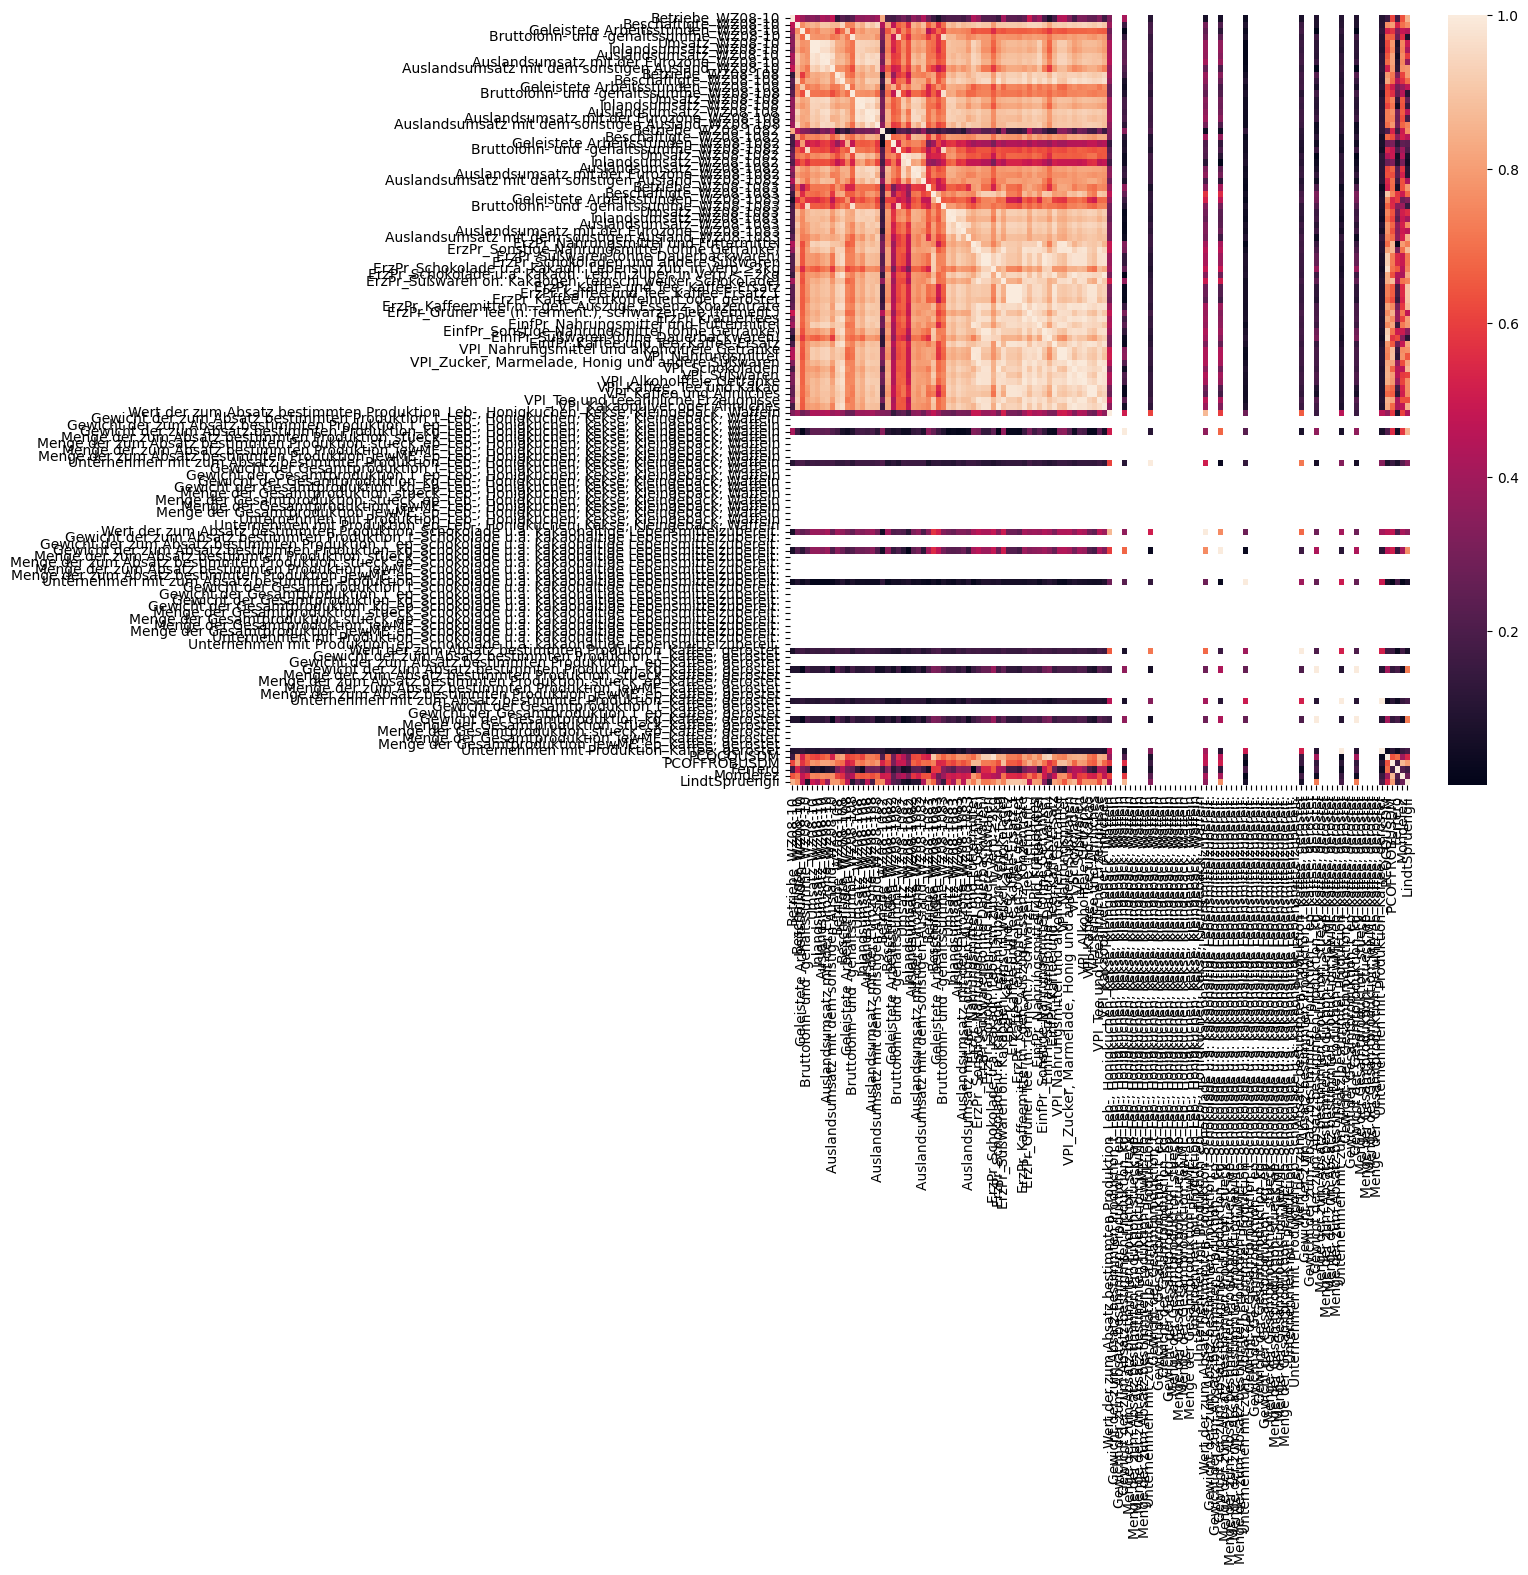

In [13]:
corr = df.loc[:,columns_numeric].corr()
fig_heatmap, ax_heatmap = plt.subplots(nrows=1, ncols=1, figsize=(10,10));
sns.heatmap(corr.abs(), xticklabels=True, yticklabels=True, ax=ax_heatmap)

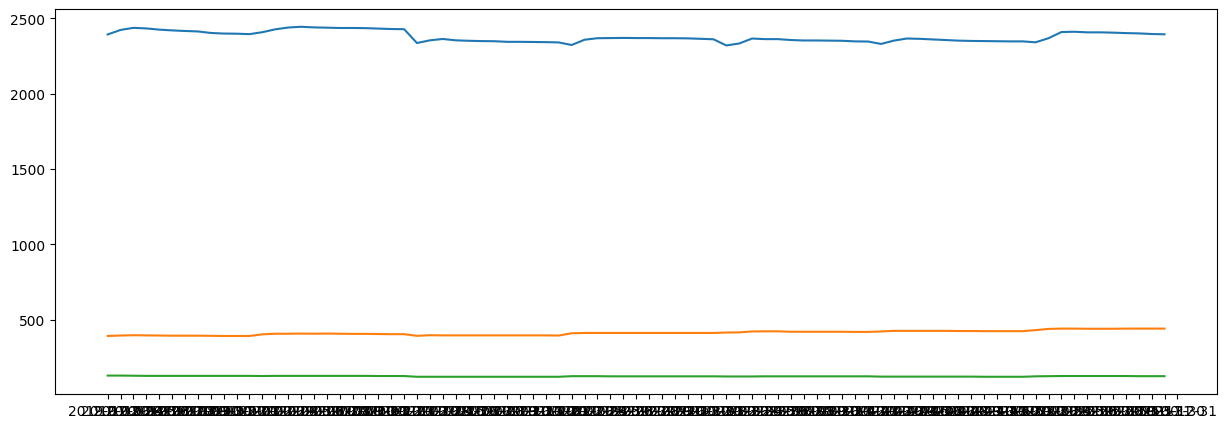

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5));
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-10']
)
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-108']
)
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-1082']
)